<a href="https://colab.research.google.com/github/joshgregory42/port_calcs/blob/main/solids_calcs_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# User Inputs

Change the following variables to the desired values

## Diameters

`d_mm` is the diameter in mm

In [3]:
d_mm_outer = 3 # Edit this line
d_mm_inner = 4 # Edit this line

## Length

Length of the trocar in mm

In [4]:
# Length of the trocar in mm
L_mm = 100 # Edit this line

## Applied force on end of trocar in N

In [5]:
P = 30 # Edit this line

## Young's modulus/modulus of elasticity in MPa

In [6]:
E_mpa = 99 # Edit this line

## Couple moment on end of trocar, N$\cdot$m

In [7]:
M_0 = 0.5 # Edit this line

# Main code body

Don't need to edit any of this

In [8]:
# Calculate the deflection and elastic curve for cantilevered beam due to a force P on the end (Hibbeler solids 10th ed., p. 815, first diagram from the top)
def force_deflect(I, L, P, E, x):
    """
    Calculate the deflection and elastic curve for a cantilevered beam due to a force P on the end.

    Parameters:
    I (float): Moment of inertia of the section.
    L (float): Length of the beam.
    P (float): Force applied on the end of the beam.
    E (float): Modulus of elasticity of the material.
    x (float): Distance from the fixed end.

    Returns:
    tuple: Maximum deflection angle, maximum deflection, deflection at distance x.
    """

    theta_max = (- P * L**2) / (2*E*I)

    v_max = (-P * L**3) / (3*E*I)

    v = ( (-P*x**2) / (6*E*I) ) * (3*L - x)

    return theta_max, v_max, v

# Calculate the deflection and elastic curve for cantilevered beam due to couple moment M_0 on the end (Hibbeler solids 10th ed., p. 815, fourth diagram from the top)
def moment_deflect(I, L, E, M_0, x):
    """
    Calculate the deflection and elastic curve for a cantilevered beam due to a couple moment M_0 on the end.

    Parameters:
    I (float): Moment of inertia of the section.
    L (float): Length of the beam.
    E (float): Modulus of elasticity of the material.
    M_0 (float): Couple moment on the end of the beam.
    x (float): Distance from the fixed end.

    Returns:
    tuple: Maximum deflection angle, maximum deflection, deflection at distance x.
    """

    theta_max = (M_0*L) / (E*I)

    v_max = (M_0 * L**2) / (2*E*I)

    v = ( M_0*x**2 ) / (2*E*I)

    return theta_max, v_max, v

def rad_to_degree(rad_meas):
    deg_meas = rad_meas * (180 / np.pi)

    return deg_meas

d_m_outer = d_mm_outer / 1000
d_m_inner = d_mm_inner / 1000

I = np.pi*(d_m_outer**4 - d_m_inner**4) / 64 # I_x = I_y = I

L = L_mm / 1000

x = np.linspace(start=0, stop=L, num=10000) # Points for elastic curve

E = E_mpa * 1000000

force_stats = force_deflect(I, L, P, E, x)
moment_stats = moment_deflect(I, L, E, M_0, x)

decimal_round = 3 # Round to this

# Outputs

## Calculations from force

Maximum deflection:

In [9]:
print(str(round(force_stats[1], decimal_round)) + ' m = ' + str(round(force_stats[1]*1000, decimal_round)) + ' mm')

11.759 m = 11758.634 mm


Maximum angular deflection:

In [10]:
print(str(round(force_stats[0], decimal_round)) + ' rad. = ' + str(rad_to_degree(round(force_stats[0], decimal_round))) + ' deg.')

176.38 rad. = 10105.82959051746 deg.


## Calculations from moment

Maximum deflection:

In [11]:
print(str(round(moment_stats[1], decimal_round)) + ' m = ' + str(round(moment_stats[1]*1000, decimal_round)) + ' mm')

-2.94 m = -2939.658 mm


Maximum angular deflection:

In [12]:
print(str(round(moment_stats[0], decimal_round)) + ' rad. = ' + str(rad_to_degree(round(moment_stats[0], decimal_round))) + ' deg.')

-58.793 rad. = -3368.590764912649 deg.


# Elastic curve plots

## Elastic curve plot from force

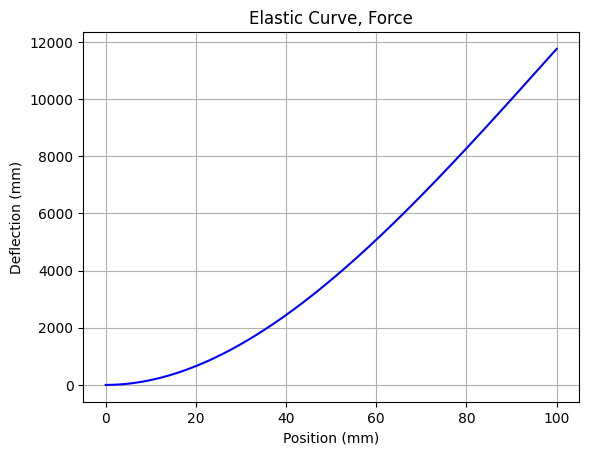

In [13]:
plt.plot(x*1000, force_stats[2]*1000, 'b')
plt.xlabel('Position (mm)')
plt.ylabel('Deflection (mm)')
plt.title('Elastic Curve, Force')
plt.grid(True)
plt.show()

## Elastic curve plot from moment

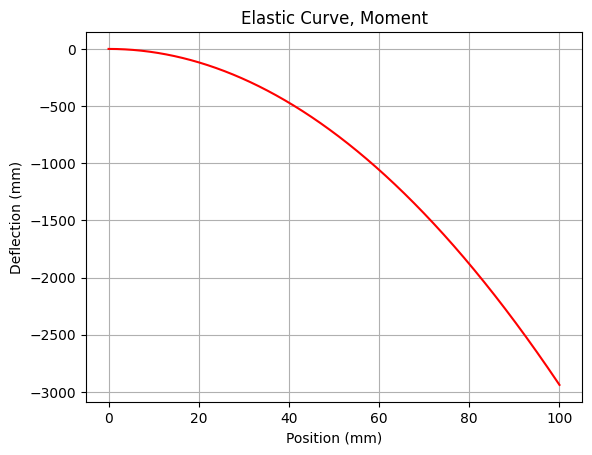

In [14]:
plt.plot(x*1000, moment_stats[2]*1000, 'r')
plt.xlabel('Position (mm)')
plt.ylabel('Deflection (mm)')
plt.title('Elastic Curve, Moment')
plt.grid(True)
plt.show()